In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


queries = pd.read_csv('data/train_queries.csv', delimiter='\t')
docs = pd.read_json('data/docs.jsonl', lines=True)

In [10]:
queries['query_word_count'] = queries['text'].str.split().str.len()
docs['body_word_count'] = docs['body'].str.split().str.len()

print("Query length statistics:")
print(queries['query_word_count'].describe())

print("\nDocument length statistics:")
print(docs['body_word_count'].describe())

Query length statistics:
count    10000.0000
mean         5.9336
std          2.4418
min          1.0000
25%          4.0000
50%          6.0000
75%          7.0000
max         28.0000
Name: query_word_count, dtype: float64

Document length statistics:
count    200000.000000
mean       1813.084075
std        3364.247271
min           0.000000
25%         475.000000
50%         893.000000
75%        1966.000000
max      280733.000000
Name: body_word_count, dtype: float64


In [6]:
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
print(queries['query_word_count'].quantile(percentiles))
print()
print(docs['body_word_count'].quantile(percentiles))

from scipy.stats import skew
print("Skew of query lengths:", skew(queries['query_word_count']))

0.10    3.0
0.25    4.0
0.50    6.0
0.75    7.0
0.90    9.0
Name: query_word_count, dtype: float64
0.10     243.0
0.25     475.0
0.50     893.0
0.75    1966.0
0.90    3984.1
Name: body_word_count, dtype: float64
Skew of query lengths: 1.2705069231476416


In [11]:
print("Empty queries:", (queries['query_word_count']==0).sum())
print("Docs > 10k words:", (docs['body_word_count']>1e4).sum())

Empty queries: 0
Docs > 10k words: 4098


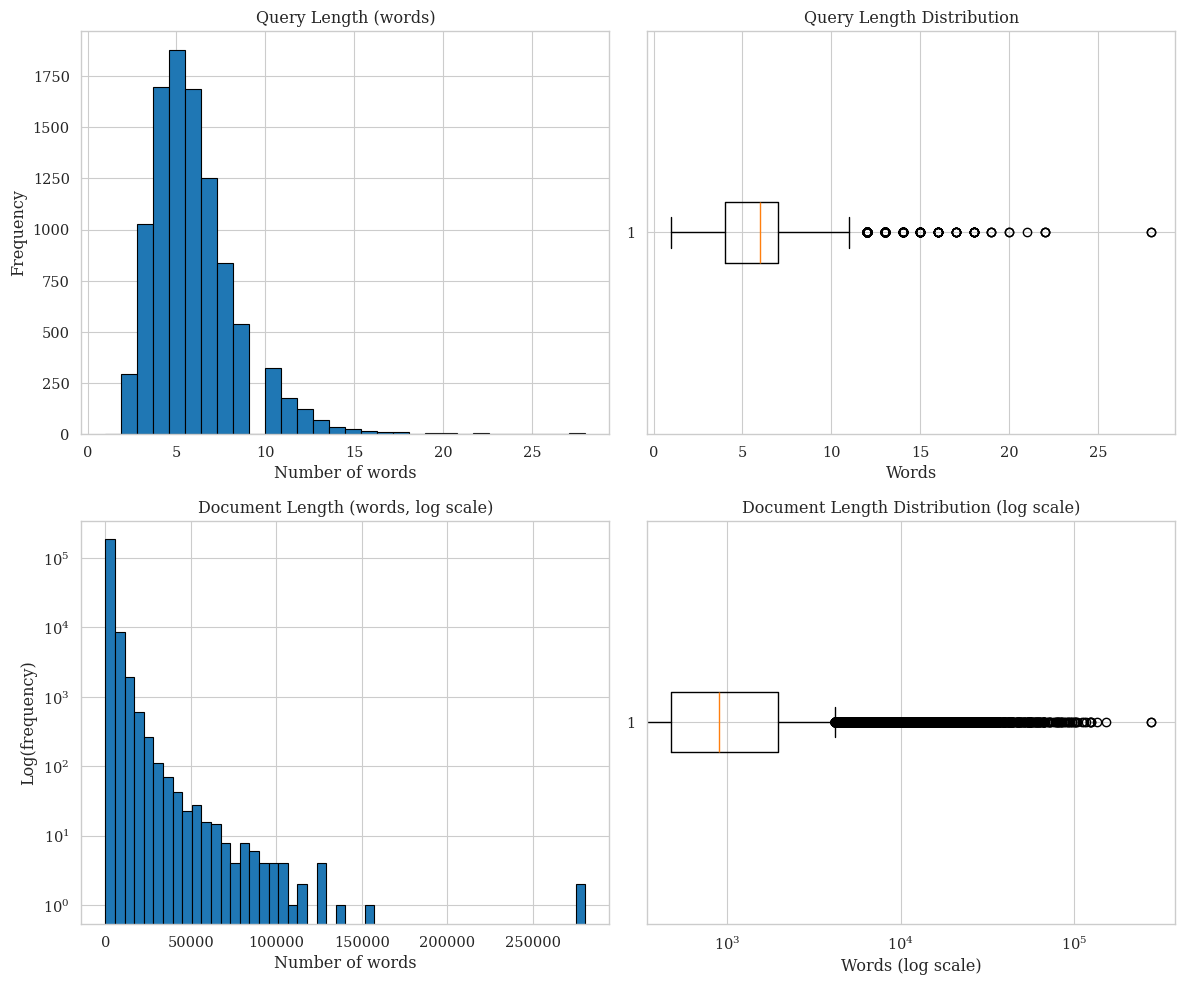

In [13]:
import matplotlib.pyplot as plt

# 1. Set a clean, serif style and larger fonts:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2)
plt.rc('font', family='serif')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Query length histogram (words)
axes[0,0].hist(queries['query_word_count'], bins=30, edgecolor='black')
axes[0,0].set_title('Query Length (words)')
axes[0,0].set_xlabel('Number of words')
axes[0,0].set_ylabel('Frequency')

# Query boxplot
axes[0,1].boxplot(queries['query_word_count'], vert=False)
axes[0,1].set_title('Query Length Distribution')
axes[0,1].set_xlabel('Words')

# Document length histogram (log-y)
axes[1,0].hist(docs['body_word_count'], bins=50, edgecolor='black')
axes[1,0].set_yscale('log')
axes[1,0].set_title('Document Length (words, log scale)')
axes[1,0].set_xlabel('Number of words')
axes[1,0].set_ylabel('Log(frequency)')

# Document boxplot
axes[1,1].boxplot(docs['body_word_count'], vert=False)
axes[1,1].set_title('Document Length Distribution (log scale)')
axes[1,1].set_xlabel('Words (log scale)')
axes[1,1].set_xscale('log')

plt.tight_layout()
plt.savefig('length_distributions.pdf', format='pdf', bbox_inches='tight')
plt.show()